In [138]:
import pandas as pd
opsd_daily = pd.read_csv(r"C:\Users\shaik_be\Downloads\opsd_germany_daily.csv")
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


We will explore how electricity consumption and production in Germany have varied over time, using pandas time series tools to answer questions such as:

When is electricity consumption typically highest and lowest?
How do wind and solar power production vary with seasons of the year?
What are the long-term trends in electricity consumption, solar power, and wind power?
How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

In [4]:
d = pd.to_datetime("4th of July, 2015")
d

Timestamp('2015-07-04 00:00:00')

In [12]:
d.strftime("%A")

'Saturday'

In [16]:
import numpy as np
d + pd.to_timedelta(np.arange(10), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13'],
              dtype='datetime64[ns]', freq=None)

In [20]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [22]:
data['2014-07-04' : '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex

In [29]:
from datetime import datetime 
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [33]:
dates.to_period('D')
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

A TimedeltaIndex is created, for example, when a date is subtracted from another:

In [38]:
dates- dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [40]:
pd.date_range('2015-07-03', periods=8, freq = 'H')

C:\Users\shaik_be\AppData\Local\Temp\ipykernel_8080\2503808793.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq = 'H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [42]:
pd.date_range('2025-01-01',periods =5)

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05'],
              dtype='datetime64[ns]', freq='D')

In [44]:
pd.period_range('2015-07-04', periods=5, freq='H')

C:\Users\shaik_be\AppData\Local\Temp\ipykernel_8080\3911510785.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.period_range('2015-07-04', periods=5, freq='H')


PeriodIndex(['2015-07-04 00:00', '2015-07-04 01:00', '2015-07-04 02:00',
             '2015-07-04 03:00', '2015-07-04 04:00'],
            dtype='period[h]')

In [46]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [50]:
pd.timedelta_range(3, periods=10, freq='H')


C:\Users\shaik_be\AppData\Local\Temp\ipykernel_8080\1895605510.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(3, periods=10, freq='H')


TimedeltaIndex(['0 days 00:00:00.000000003', '0 days 01:00:00.000000003',
                '0 days 02:00:00.000000003', '0 days 03:00:00.000000003',
                '0 days 04:00:00.000000003', '0 days 05:00:00.000000003',
                '0 days 06:00:00.000000003', '0 days 07:00:00.000000003',
                '0 days 08:00:00.000000003', '0 days 09:00:00.000000003'],
               dtype='timedelta64[ns]', freq='h')

In [52]:
pd.timedelta_range(0, periods=9, freq="2H30T")

C:\Users\shaik_be\AppData\Local\Temp\ipykernel_8080\2180289880.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")
C:\Users\shaik_be\AppData\Local\Temp\ipykernel_8080\2180289880.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150min')

In [58]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=8, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='B')

In [140]:
opsd_daily.shape

(4383, 5)

In [142]:
opsd_daily.head(4)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN


In [120]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [144]:
opsd_daily['Date']=pd.to_datetime(opsd_daily['Date'])

In [146]:
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [148]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [134]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [150]:
opsd_daily['Year']=opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month

opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8
2013-08-08,1291.984,79.666,93.371,173.037,2013,8
2009-08-27,1281.057,NaN,NaN,NaN,2009,8
2015-10-02,1391.050,81.229,160.641,241.870,2015,10
2009-06-02,1201.522,NaN,NaN,NaN,2009,6


In [90]:
pip install --upgrade pandas==0.25.3

     ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
     -------------- ------------------------- 4.5/12.6 MB 22.3 MB/s eta 0:00:01
     -------------------------------- ------ 10.5/12.6 MB 26.1 MB/s eta 0:00:01
     --------------------------------------- 12.6/12.6 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  C:\Users\shaik_be\AppData\Local\Temp\pip-install-txejnmzt\pandas_1ac3bddef7c34c4fa777a3e219b00df8\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    import pkg_resources
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\shaik_be\AppData\Local\Temp\pip-install-txejnmzt\pandas_1ac3bddef7c34c4fa777a3e219b00df8\setup.py", line 812, in <module>
      version=versioneer.get_version(),
              ^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\shaik_be\AppData\Local\Temp\pip-install-txejnmzt\pandas_1ac3bddef7c34c4fa777a3e219b00df8\versioneer.py", line 1440, in get_version
      return get_versions()["version"]
             ^^^^^^^^^^^^^^
    File "C:\Users\shaik_be\AppData\

In [100]:
opsd_daily.loc['2013-08-08']

Consumption                                              1291.984
Wind                                                       79.666
Solar                                                      93.371
Wind+Solar                                                173.037
Year                                                         2013
Month                                                           8
Weekday Name    <bound method _inherit_from_data.<locals>.meth...
Name: 2013-08-08 00:00:00, dtype: object

In [152]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1
2014-01-21,1624.806,15.643,5.835,21.478,2014,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1


In [162]:
opsd_daily.loc['2017', 'Consumption']

Date
2017-01-01    1130.41300
2017-01-02    1441.05200
2017-01-03    1529.99000
2017-01-04    1553.08300
2017-01-05    1547.23800
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 365, dtype: float64

<Axes: xlabel='Date'>

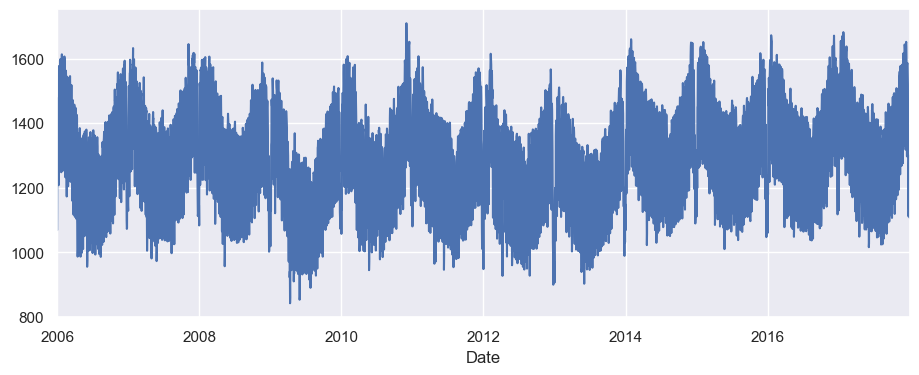

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Consumption'].plot()

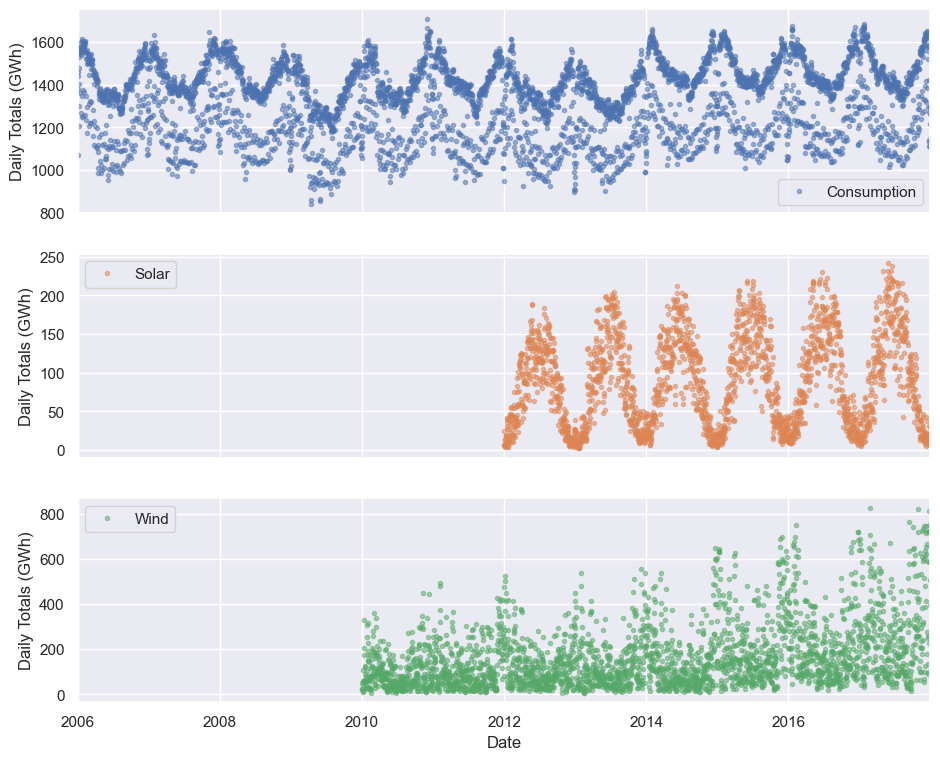

In [156]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Text(0, 0.5, 'Daily Totals (GWh)')

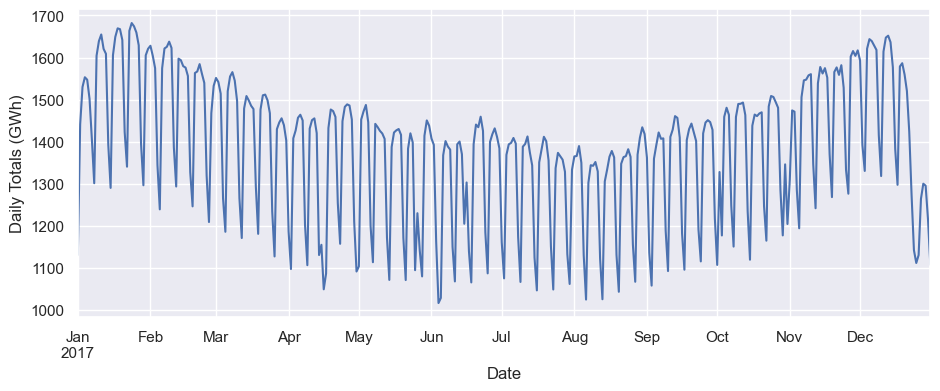

In [158]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Totals (GWh)')

Text(0, 0.5, 'Daily Totals (GWh)')

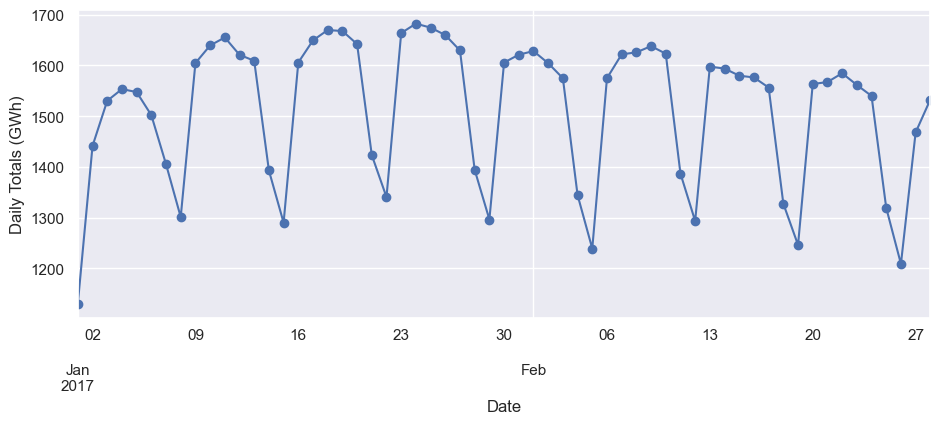

In [166]:
ax = opsd_daily.loc['2017-01' : '2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Totals (GWh)')

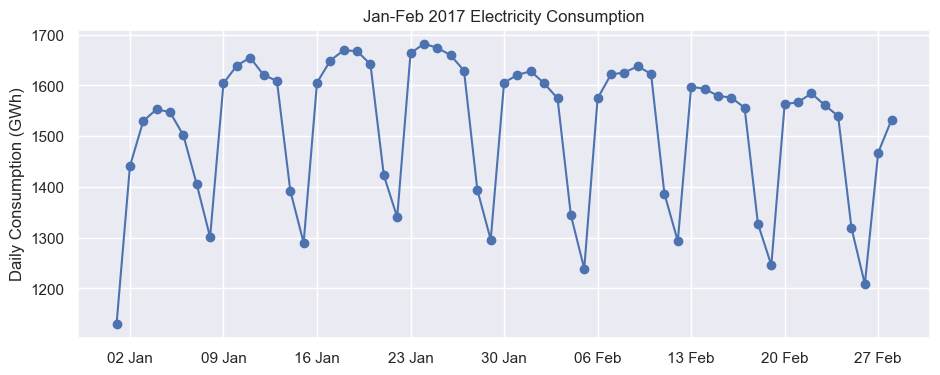

In [178]:
import matplotlib.dates as mdates
fig,ax =plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'] , marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

Frequencies
When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a frequency in pandas. 

In [184]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
consume_sample = opsd_daily.loc[times_sample, ['Consumption']]
consume_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [190]:
consume_frequency = consume_sample.asfreq('D')
# Create a column with missings forward filled
consume_frequency['Consumption - Forward Fill'] = consume_sample.asfreq('D', method='ffill')
consume_frequency

#Forward Fill column, the missings have been forward filled, meaning that the last value repeats through the missing rows until the next non-missing value occurs.

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


Resampling
It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. The daily OPSD data we're working with in this tutorial was downsampled from the original hourly time series. Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.

We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame's resample() method, which splits the DatetimeIndex into time bins and groups the data by time bin. The resample() method returns a Resampler object, similar to a pandas GroupBy object. We can then apply an aggregation method such as mean(), median(), sum(), etc., to the data group for each time bin.

In [194]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [196]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


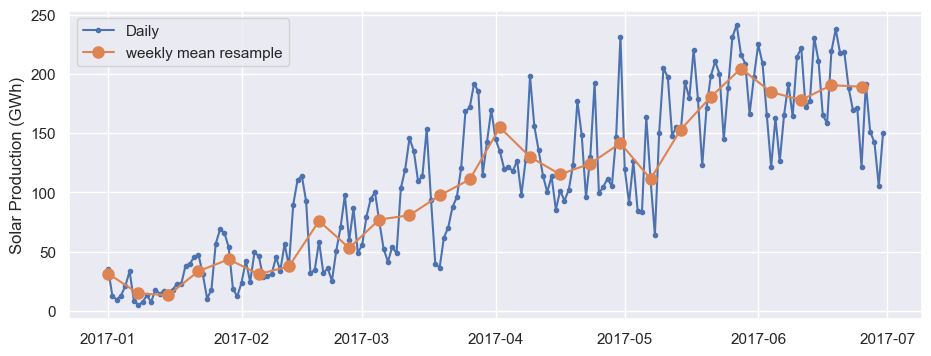

In [200]:
#Let's plot the daily and weekly Solar time series together over a single six-month period to compare them.


# Start and end of the date range to extract
start, end ='2017-01', '2017-06'

# Plot daily and weekly resampled time series together
fig, ax= plt.subplots()
ax.plot(opsd_daily.loc[start:end , 'Solar'], marker= '.', linestyle='-', label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end ,'Solar'], marker='o', markersize=8, linestyle='-',label='weekly mean resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

Now let's resample the data to monthly frequency, aggregating with sum totals instead of the mean. Unlike aggregating with mean(), which sets the output to NaN for any period with all missing data, the default behavior of sum() will return output of 0 as the sum of missing data. We use the min_count parameter to change this behavior.



In [203]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data

opsd_monthly= opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(5)

C:\Users\shaik_be\AppData\Local\Temp\ipykernel_8080\1119390994.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  opsd_monthly= opsd_daily[data_columns].resample('M').sum(min_count=28)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN
2006-04-30,38251.767,NaN,NaN,NaN
2006-05-31,38858.143,NaN,NaN,NaN


Now let's explore the monthly time series by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot.



Text(0, 0.5, 'Monthly Total (GWh)')

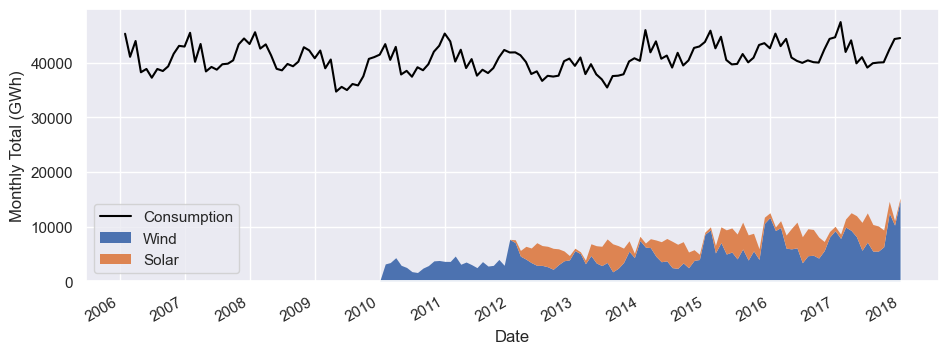

In [206]:
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)')

Let's explore this further by resampling to annual frequency and computing the ratio of Wind+Solar to Consumption for each year.

In [209]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual= opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name='Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar']/opsd_annual['Consumption']

opsd_annual.tail(3)

C:\Users\shaik_be\AppData\Local\Temp\ipykernel_8080\4095441699.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)


,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


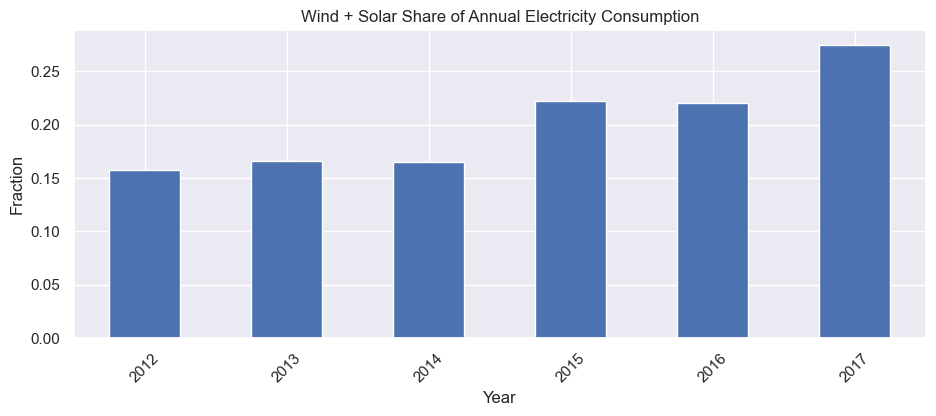

In [217]:
#Finally, let's plot the wind + solar share of annual electricity consumption as a bar chart.
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax= opsd_annual.loc[2012:,'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
#ax.set_ylim(0,0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=45);

We can see that wind + solar production as a share of annual electricity consumption has been increasing from about 15% in 2012 to about 27% in 2017.

Rolling windows
Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and "roll" along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.

By default, all data points within a window are equally weighted in the aggregation, but this can be changed by specifying window types such as Gaussian, triangular, and others. We'll stick with the standard equally weighted window here.

In [225]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN
2006-01-07,1361.471429,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-09,1402.557571,NaN,NaN,NaN


To visualize the differences between rolling mean and resampling, let's update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

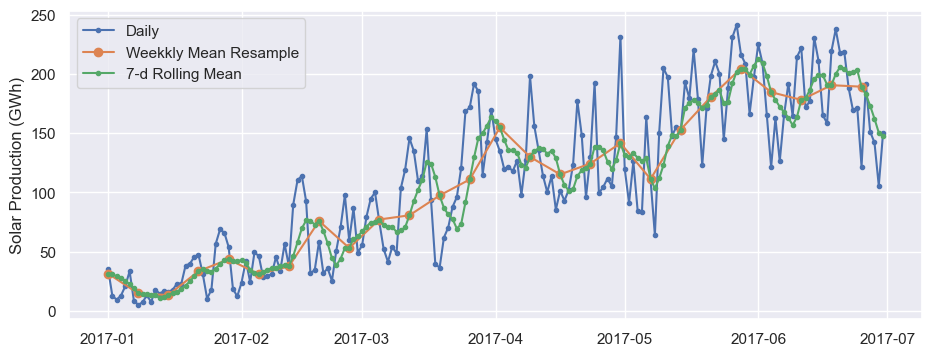

In [238]:
start,end= '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together

fig, ax=plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', label='Daily')

ax.plot(opsd_weekly_mean.loc[start : end, 'Solar'], marker='o', linestyle='-', label='Weekkly Mean Resample')

ax.plot(opsd_7d.loc[start : end,'Solar'], marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')

ax.legend();

Trends
Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let's look at rolling means on those two time scales.

In [251]:
#We've already computed 7-day rolling means, 
#so now let's compute the 365-day rolling mean of our OPSD data.

# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series

opsd_365d = opsd_daily[data_columns].rolling(window=365, min_periods=360).mean()
opsd_365d.head(15)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN
2006-01-07,NaN,NaN,NaN,NaN
2006-01-08,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN


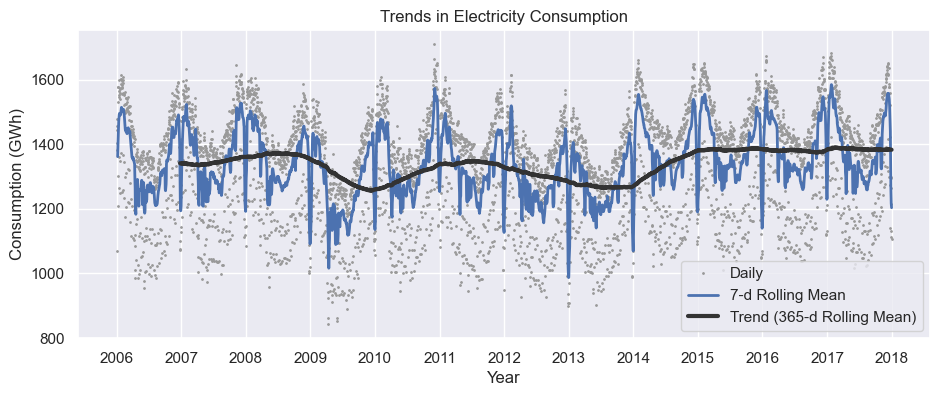

In [253]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

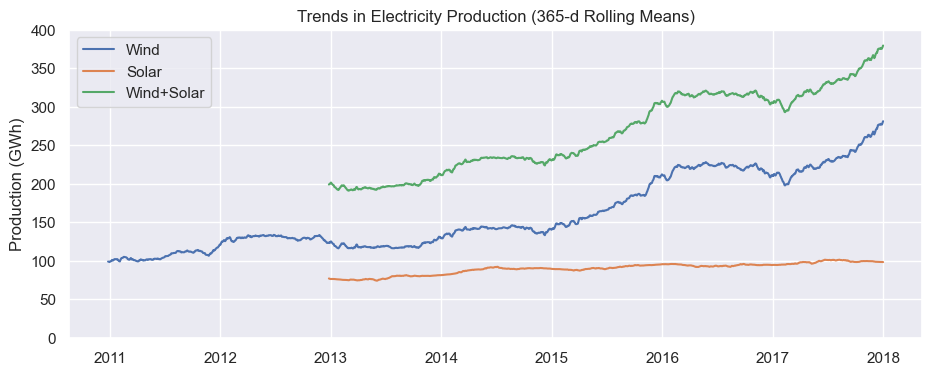

In [259]:
# let's look at trends in wind and solar production.
# Plot 365-day rolling mean time series of wind and solar power

fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    #ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0,400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')